# Term0 Week4 授業前課題2 
## コーディング課題：住宅価格の回帰分析

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使う。  
Week3同様にKaggleからデータセットをダウンロードする。train.csvのみを使用する。

In [81]:
%matplotlib inline
import numpy as np
import pandas as pd

# DataFrameは最大50列まで表示させる
pd.set_option('display.max_columns', 50)

df = pd.read_csv("train.csv")
# week3同様、非欠損値が1455個以上の列を抽出後、欠損値がある行を削除
df = df.dropna(thresh=1455, axis=1).dropna(how="any", axis=0)
df_numeric = df.select_dtypes(include=[np.number]) # 連続値のみ抽出
df_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


## 1. 練習のための特徴量の選択
今回は回帰問題の学習や評価の練習を優先するため、GrLivAreaとYearBuiltの2つだけを利用する。  
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [82]:
train = df_numeric.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
train

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
5,1362,1993,143000
6,1694,2004,307000
7,2090,1973,200000
8,1774,1931,129900
9,1077,1939,118000


## 2. 回帰問題のパイプライン
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行する。  
評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的。  
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行う。

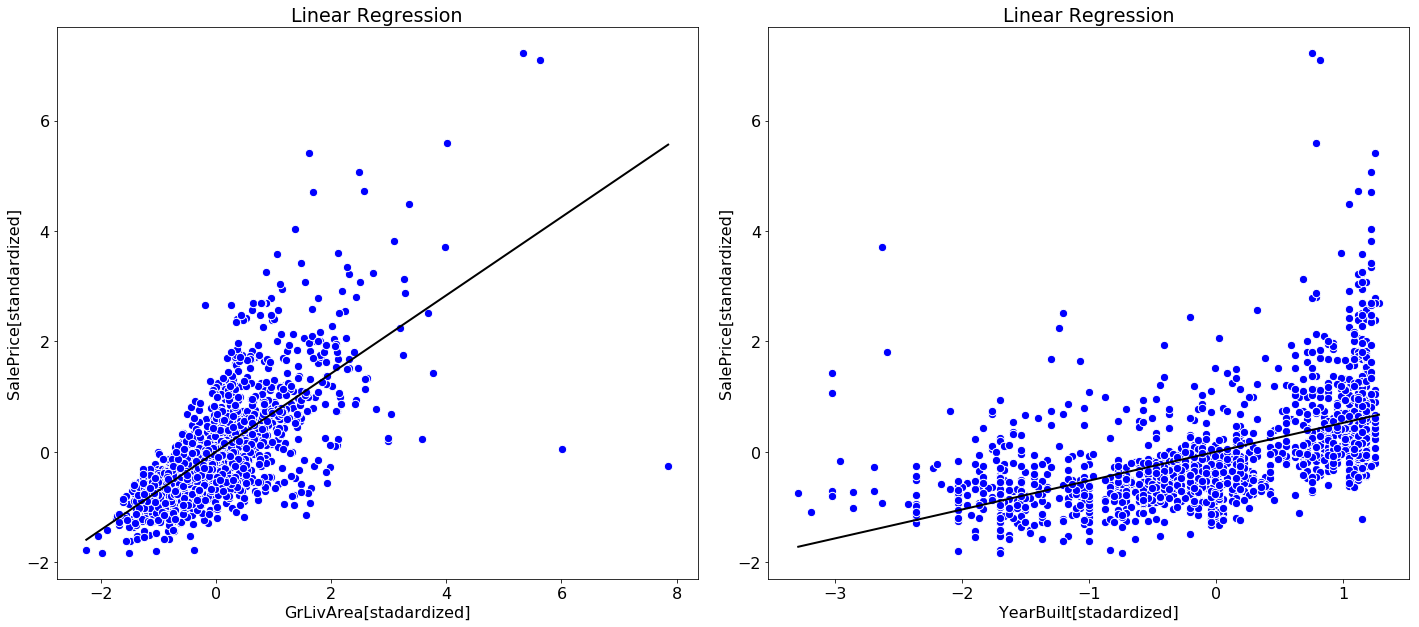

GrLivArea           YearBuilt          
                        MSE R_squared       MSE R_squared
Linear Regression       0.5       0.5      0.73      0.27

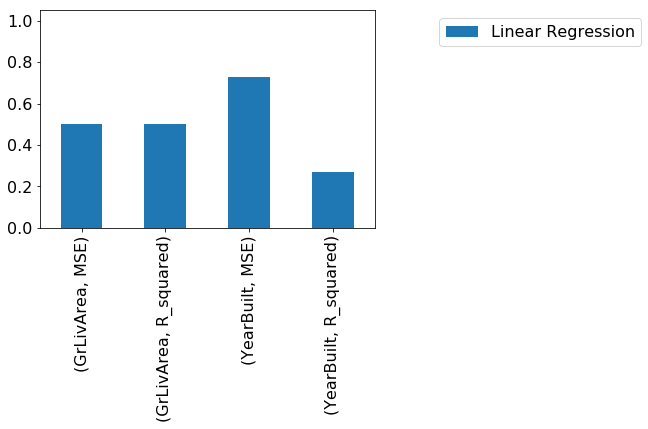

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# データ生成
feature_names = ["GrLivArea", "YearBuilt"]
target_name = "SalePrice"
X = train[feature_names].values.astype("float64") #この後のStadardScaler適用のため浮動小数点数に変更
y = train[target_name].values.astype("float64") #この後のStadardScaler適用のため浮動小数点数に変更

# 線形回帰モデルでは、説明変数・目的変数が正規分布に従っている必要はないため対数変換はしない

# 特徴量の標準化
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X) # 列ごと（特徴量ごと）に標準化

# 目的変数の標準化
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).ravel() # 変換器は2次元配列を期待するため、2次元にした後に戻す

# 学習、推定、評価、可視化のための関数を作成（複数モデル計算に対応）
def scoring_func(X, y, model_names, models, feature_names, target_name):
    """
    複数の特徴量ごとに目的変数yとの2次元プロットで回帰モデルを学習し、以下の図表を出力する。
    1. ある特徴量と目的変数の回帰図を列ごとに、それらをモデル別に行ごとにまとめた図
    2. 訓練データの平均二乗誤差(MSE)、訓練データの決定係数(R_squared)の2種スコアの特徴量別集計表

    Parameters
    ----------------
    X_ : ndarray, shape(n_samples, n_features)
        特徴量データ
    y_ : ndarray, shape(n_samples,)
        目的変数データ
    model_names : list of str
        グラフタイトルと集計表に組み込むmodel名の一覧
    models : list of instances
        学習するモデルのインスンタスの一覧
    feature_names : list of str
        軸ラベルにつける特徴量名の一覧
    target_name= : str
        軸ラベルにつける目的変数の名前
    """
    plt.figure(figsize=(20, 9*len(models)))
    plt.rcParams["font.size"] = 16
    # subplotのためのイテレータを作成。subplotsの行がモデル数、列が特徴量数で作図
    subplot_iterator = iter(np.arange(1,len(models)*X.shape[1]+1))
    score = []
    for model_name, model in zip(model_names, models):
        # 各図は横軸に特徴量、縦軸に推測した住宅価格で可視化
        for i, feature_name in enumerate(feature_names):
            X_feature = X[:, i].reshape(-1,1)
            plt.subplot(len(models), X.shape[1], next(subplot_iterator))
            model.fit(X_feature, y)
            # 評価指標（MSE、決定係数）をscoreリストへ格納
            y_pred = model.predict(X_feature)
            score.append(mean_squared_error(y, y_pred))
            score.append(r2_score(y, y_pred))
            # 可視化
            sort_idx = X_feature.flatten().argsort() # 回帰直線図示用に変数を並び替えするインデックスを作成
            plt.scatter(X_feature, y, c="blue", edgecolor="white", s=70)
            plt.plot(X_feature[sort_idx], y_pred[sort_idx], c="black", lw=2)
            plt.title(model_name)
            plt.xlabel(feature_name+"[stadardized]")
            plt.ylabel(target_name+"[standardized]")
    plt.tight_layout()
    plt.show()
    # scoreをpd.DataFrame形式に整形して表示
    score = np.array(score).reshape(-1, 2*X.shape[1]).round(2) # スコア種数*特徴量数
    columns = pd.MultiIndex.from_arrays([
        np.repeat(feature_names, 2), ["MSE", "R_squared"]*X.shape[1]])
    score = pd.DataFrame(score, index=model_names, columns=columns)
    display(score)
    # scoreを棒グラフで表示
    score.T.plot(kind="bar") # スコア毎に棒グラフを表示
    plt.legend(loc="upper right", bbox_to_anchor=(1.82, 1))
    plt.ylim(0.0,1.05)
    plt.show()

# 関数実行のための変数を用意
model_names = ["Linear Regression"]
models = [LinearRegression()]
feature_names = ["GrLivArea", "YearBuilt"]
target_name = "SalePrice"

# 実際に関数実行
scoring_func(X_std, y_std, model_names, models, feature_names, target_name)

## 3. 手法の比較
以下の全ての手法について学習・推定・評価・可視化を行い、指標値を１つの表にまとめる。その表と可視化した図を利用して結果を簡単に考察する。どの手法でどの指標値が良かったかや、どういった図になっていたかを述べる。なお、本来はそれぞれパラメータをチューニングするべきだが、まずはデフォルトで実行する。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


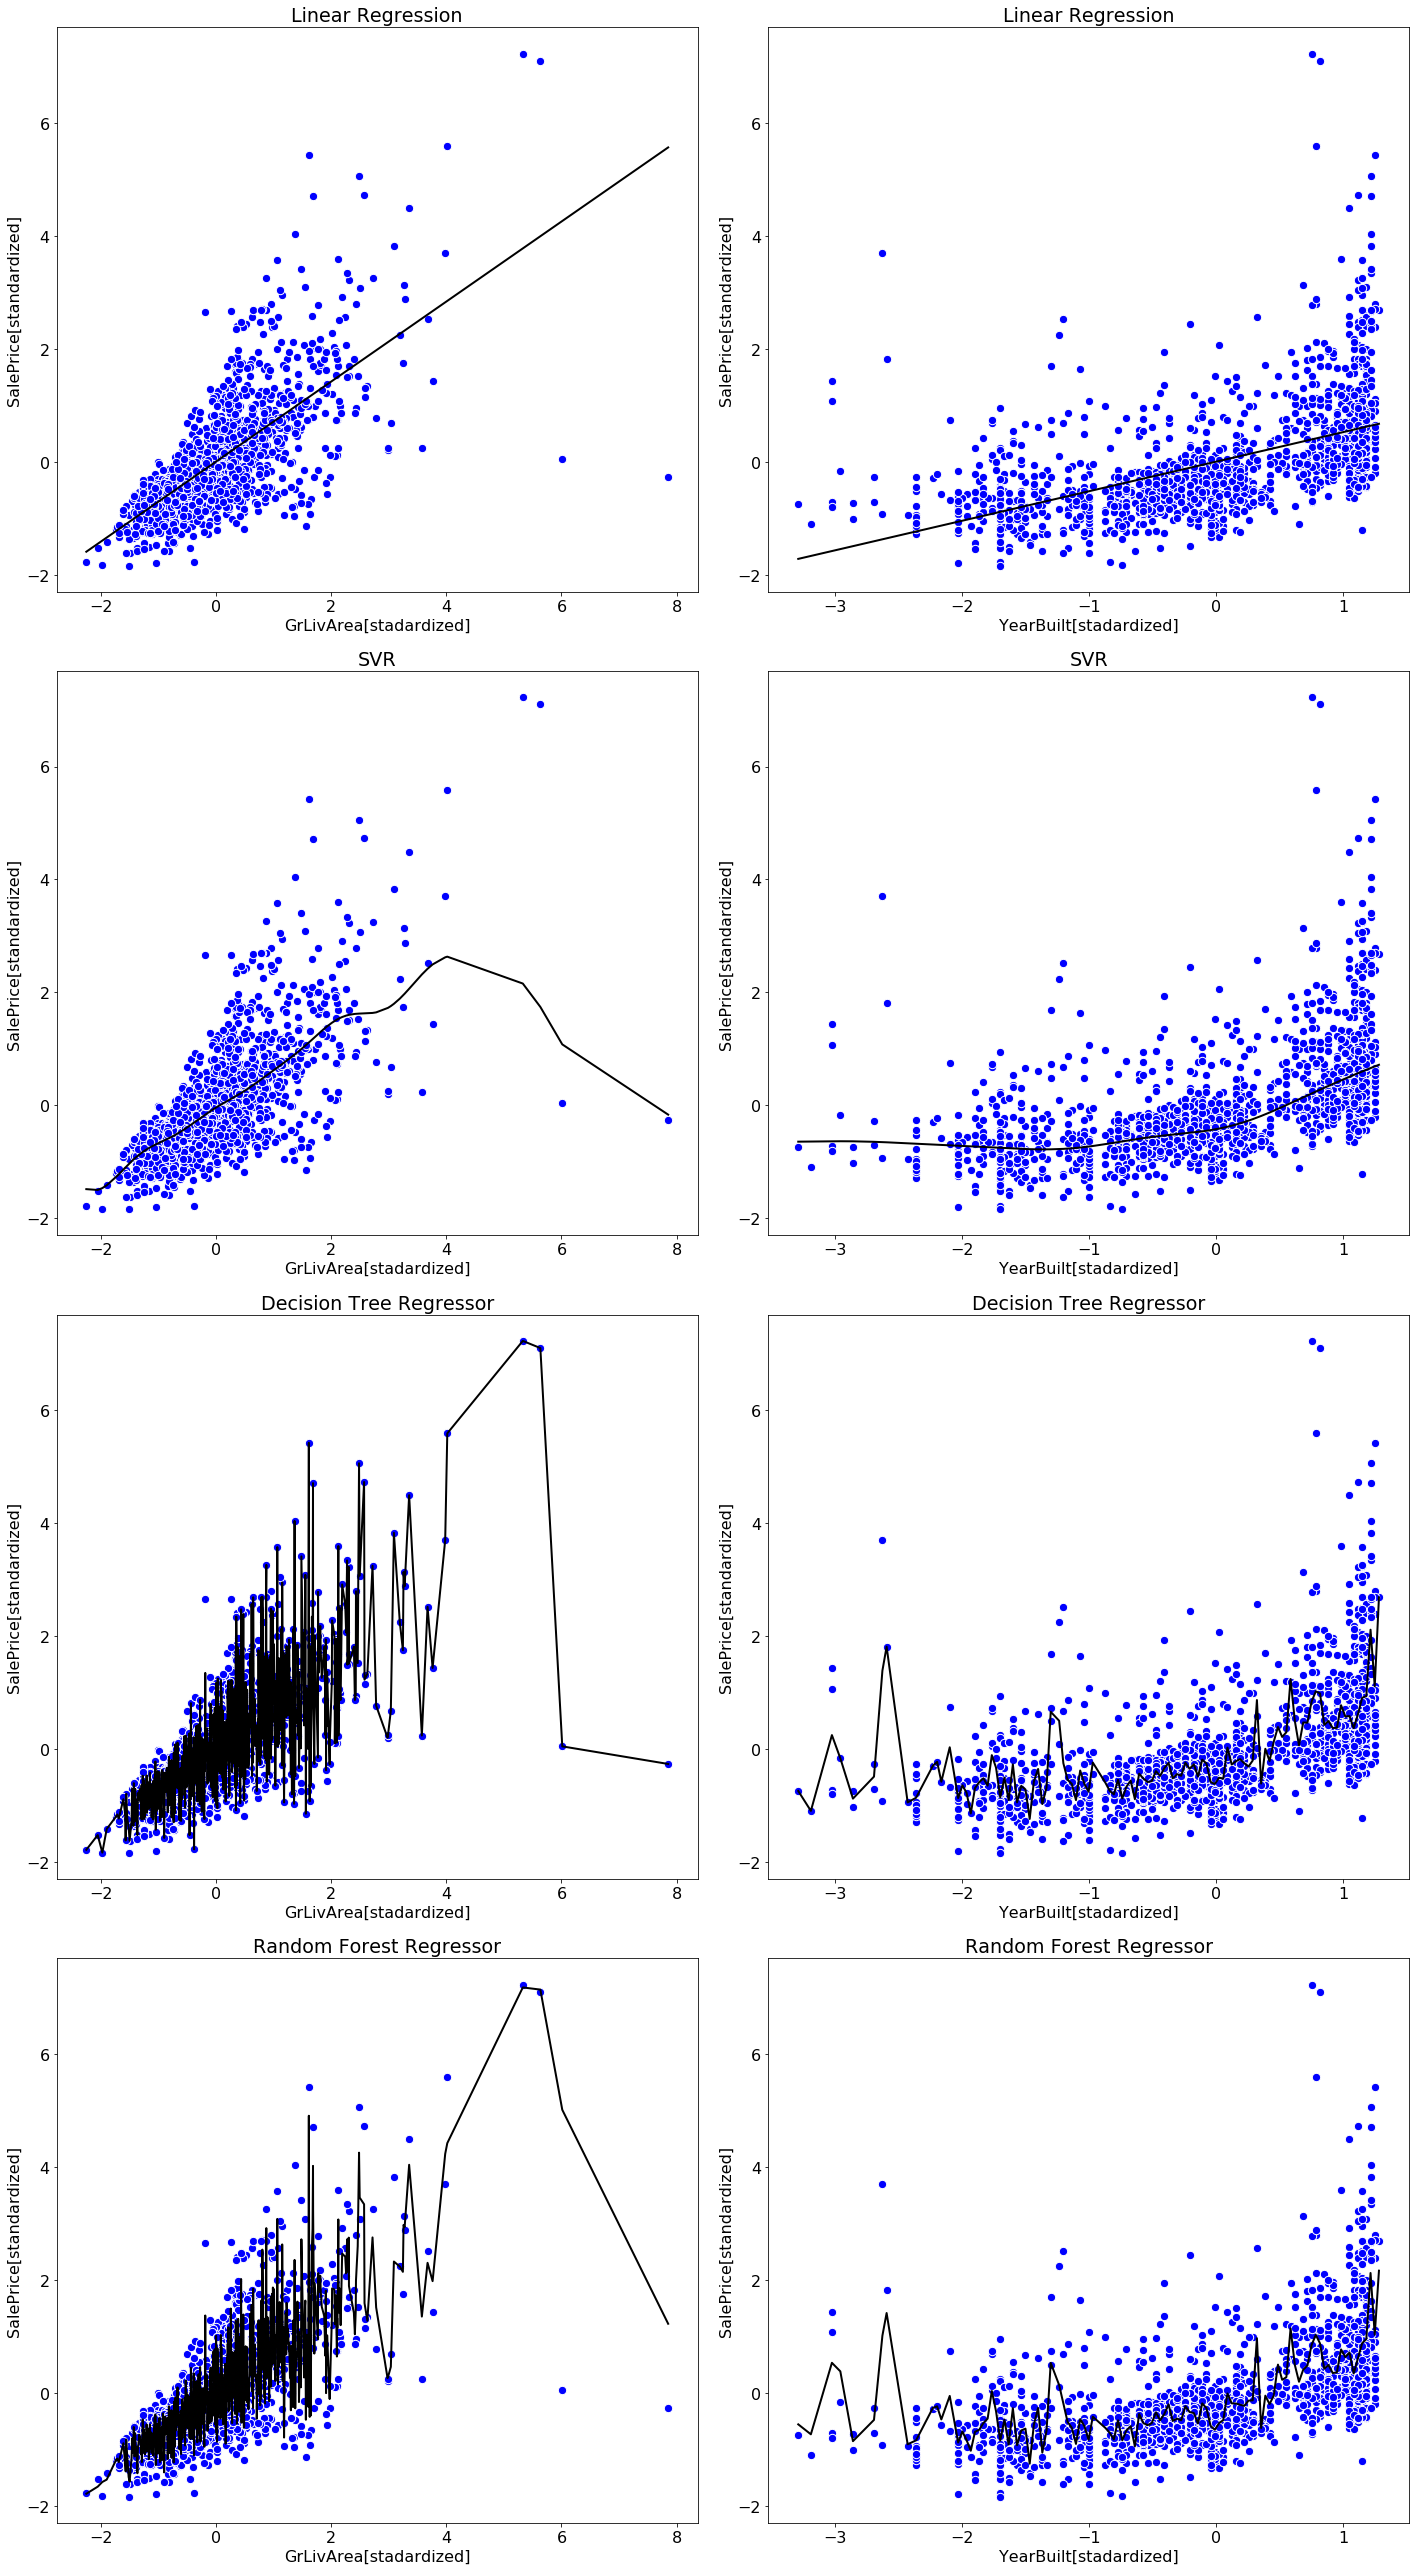

GrLivArea           YearBuilt          
                              MSE R_squared       MSE R_squared
Linear Regression            0.50      0.50      0.73      0.27
SVR                          0.49      0.51      0.68      0.32
Decision Tree Regressor      0.12      0.88      0.56      0.44
Random Forest Regressor      0.20      0.80      0.56      0.44

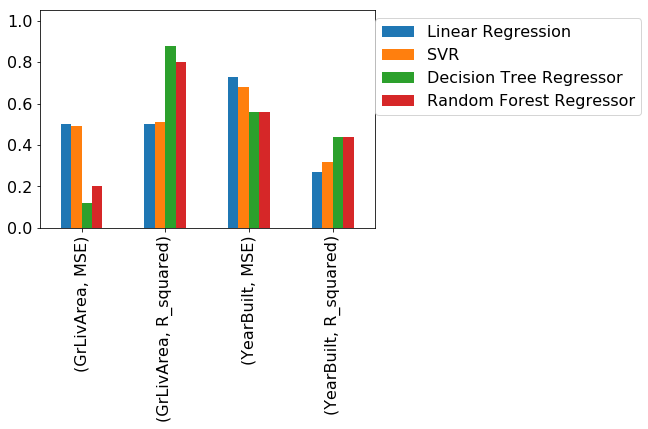

In [84]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.svm import SVR as svr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor as rfr

# 関数実行のための変数を用意
model_names = ["Linear Regression", "SVR", "Decision Tree Regressor", "Random Forest Regressor"]
models = [lr(), svr(), dtr(), rfr()]
feature_names = ["GrLivArea", "YearBuilt"]
target_name = "SalePrice"

# 実際に関数実行
scoring_func(X_std, y_std, model_names, models, feature_names, target_name)

## 4.（アドバンス課題）各パラメータの意味
手法のパラメータはデフォルトとしたが、実際に利用する上ではデフォルトは必ずしも良い設定ではない。それぞれの意味を調査した上で複数の設定を試し、その結果を報告する。

**Linear Regression**    
外れ値に誘引されて若干fitting不備のようにも見えるが、公式のscikit-learnには外れ値調整のためのパラメータがないので、今回はパラメータ調整なし。

**SVR**  
- kernel:  
　射影関数$\phi$を使って訓練データを高次元空間に変換し、この新しい特徴空間でモデルを訓練する。データ次元を高めることで、回帰により適したデータ群にできるようになる。これを元の特徴空間に逆射影することで非線形の回帰曲線を生成することができる。高次元空間への射影時には計算コストがかかり、これを回避する手法としてカーネルトリックが存在する。パラメータkernelにて射影関数$\phi$（高次元空間へのマップ方法）を指定するが、SVRで最も広く使用されているカーネルの一つが放射基底関数（rbf: radial basis function）となる。データポイントと回帰線との距離は次式のようにガウシアンカーネルで測られる。
 $$k_{rbf}(x,x^{(i)})=exp(-\gamma||x-x^{(i)}||^2)$$
 $$\gamma=\frac{1}{2\sigma^2}$$
 上式の距離計算において発生するベクトルの内積$x^Tx^{(i)}$を$\phi(x)^T\phi(x^{(i)})$に置き換えることで計算コストを回避する。

- C:  
正則化パラメータ$\lambda$に直接関連しており、その逆数をとる。
$$C=\frac{1}{\lambda}$$
Cが小さい場合は制限されたモデルに対応し、個々のデータポイントの与える影響は小さくなる。Cが大きい場合は、個々のデータポイントがそれぞれ強い影響を持つことになり、訓練データに対して正しくfittingするように回帰曲線を曲げ、時には過学習の恐れも出てくる。

- gamma:  
　gammaは上式のガウシアンカーネルの幅を調整するパラメータのこと。gammaが小さいと、多くの点を近いと判断する。これにより回帰線は滑らかになる。gammaが大きいと、多くの点を遠いと判断し、個々のデータポイントをより重視するような、複雑な回帰線になる。この場合は当然モデルもより複雑になる。

- degree:  
多項式(polynomial)カーネル関数において、多項式変量の最大次数。他のカーネルを使用する際は値の指定不要。


**Decision Tree Regressor & Random Forest Regressor**  
- max_depth:  
決定木の深さを設定する。深くなるほど決定境界は複雑になり、過学習に陥りやすくなるので注意が必要。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


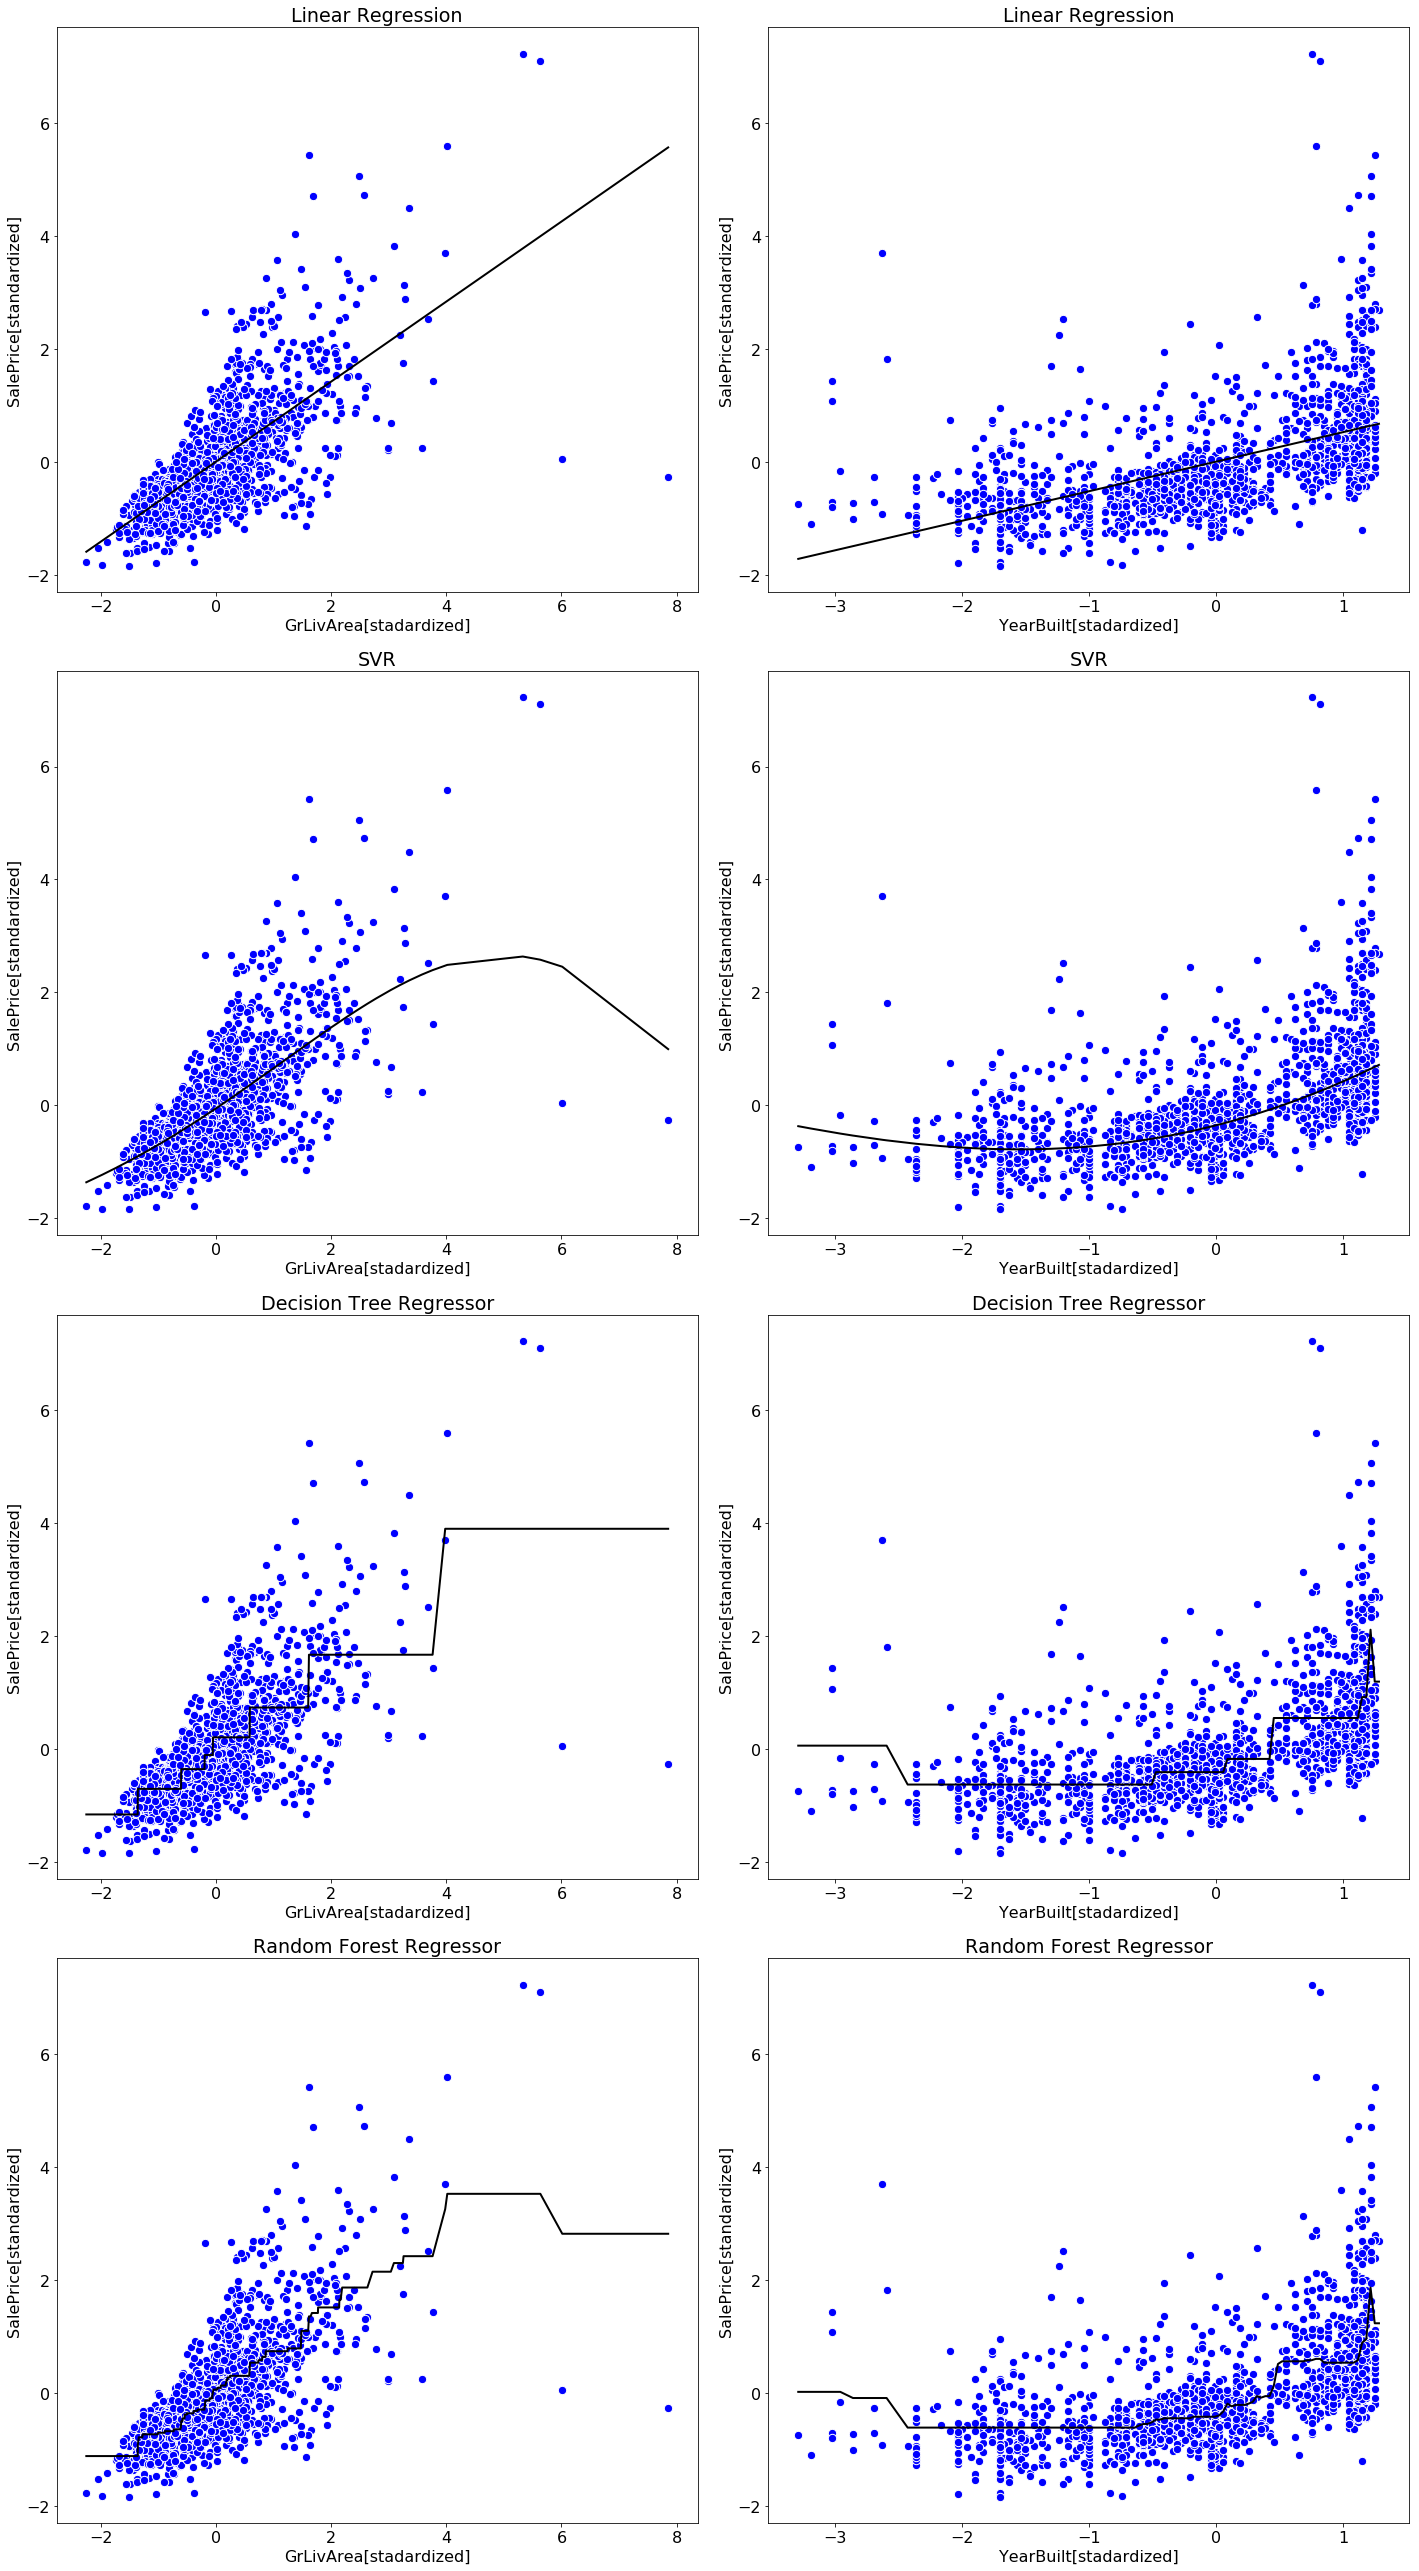

GrLivArea           YearBuilt          
                              MSE R_squared       MSE R_squared
Linear Regression            0.50      0.50      0.73      0.27
SVR                          0.49      0.51      0.68      0.32
Decision Tree Regressor      0.48      0.52      0.61      0.39
Random Forest Regressor      0.46      0.54      0.61      0.39

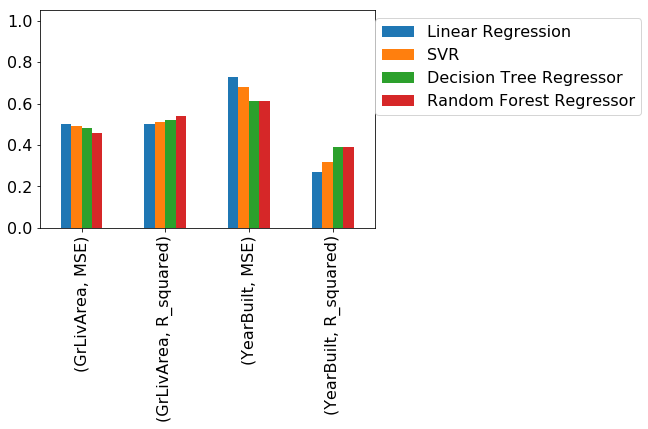

In [85]:
# 関数実行のための変数を用意
model_names = ["Linear Regression", "SVR", "Decision Tree Regressor", "Random Forest Regressor"]
models = [lr(), 
          svr(kernel="rbf", C=100, gamma=0.01), 
          dtr(max_depth=3), 
          rfr(max_depth=3)]
feature_names = ["GrLivArea", "YearBuilt"]
target_name = "SalePrice"

# 実際に関数実行
scoring_func(X_std, y_std, model_names, models, feature_names, target_name)

## 5.（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使ったが、他の特徴量を加えるとどのようになるか検証する。どう選択・加工するかにはデータ分析が重要になる。Kaggleのカーネルも参考となる。  
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels　"House Prices: Advanced Regression Techniques | Kaggle")  

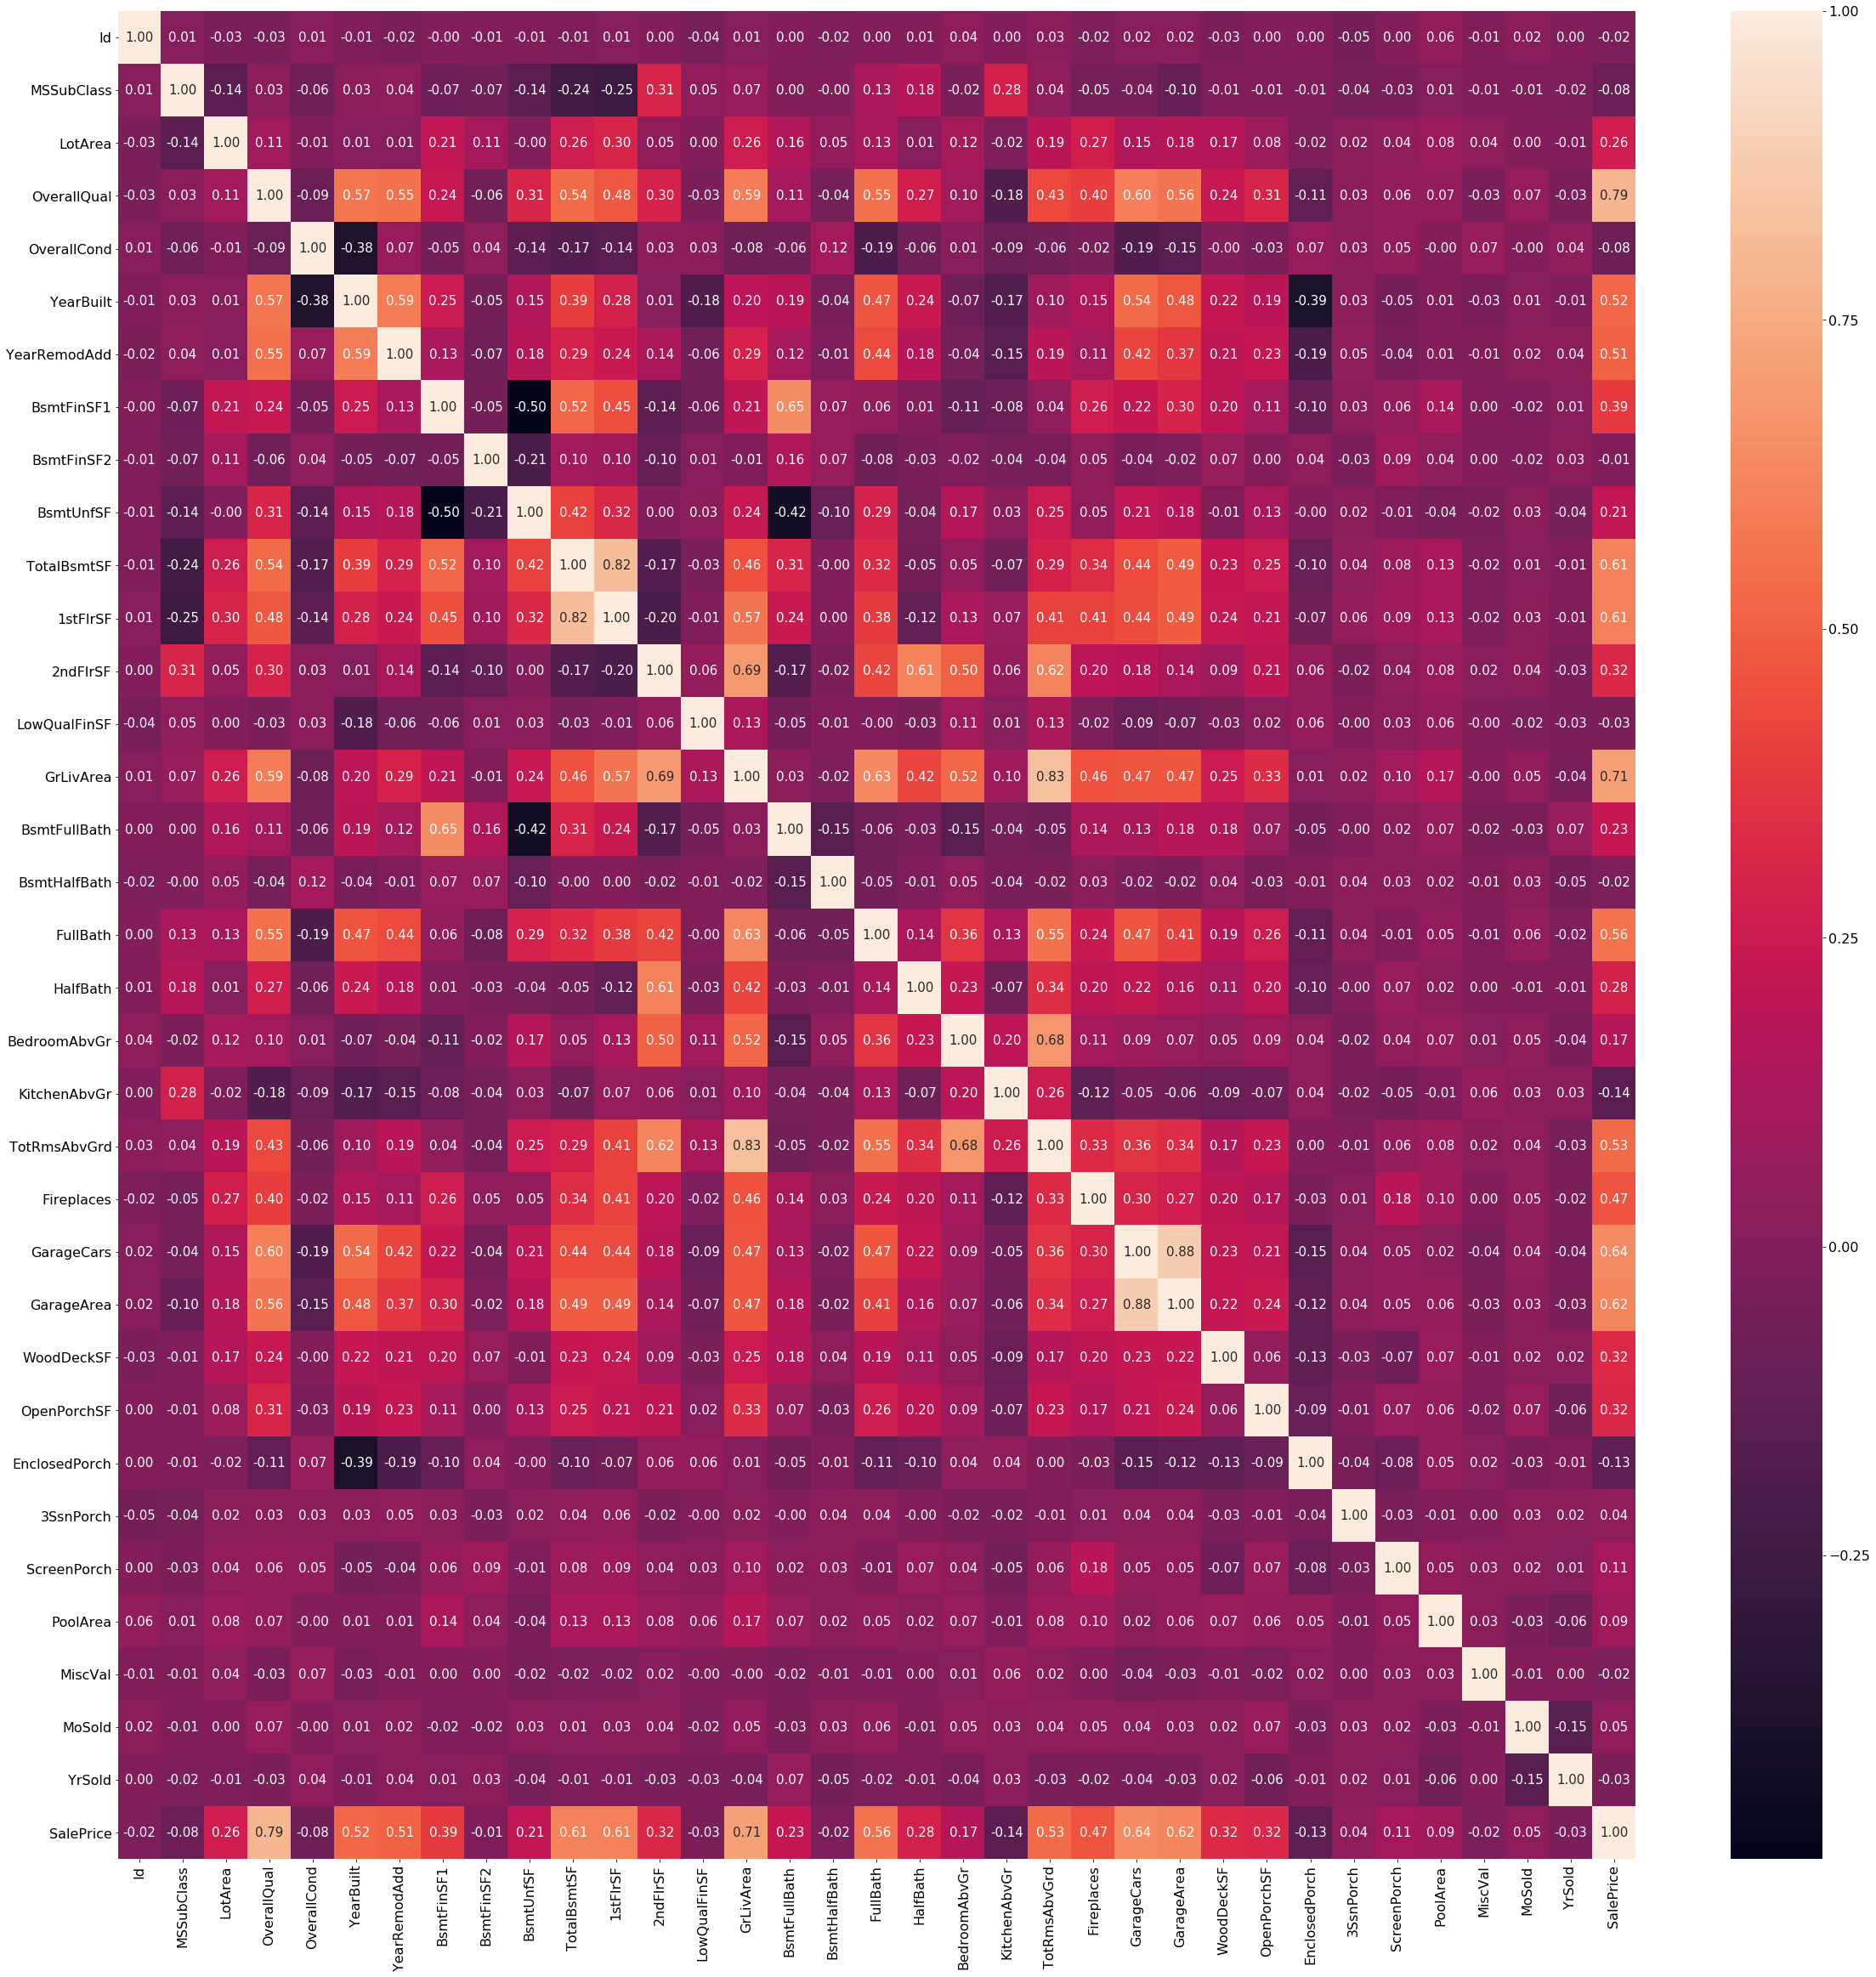

In [86]:
# 散布図行列と相関係数行列から線形回帰に適している特徴量を探す
corrcoef = df_numeric.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrcoef, annot=True, annot_kws={"size": 15}, fmt=".2f")

In [87]:
corrcoef["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
Name: SalePrice, dtype: float64

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


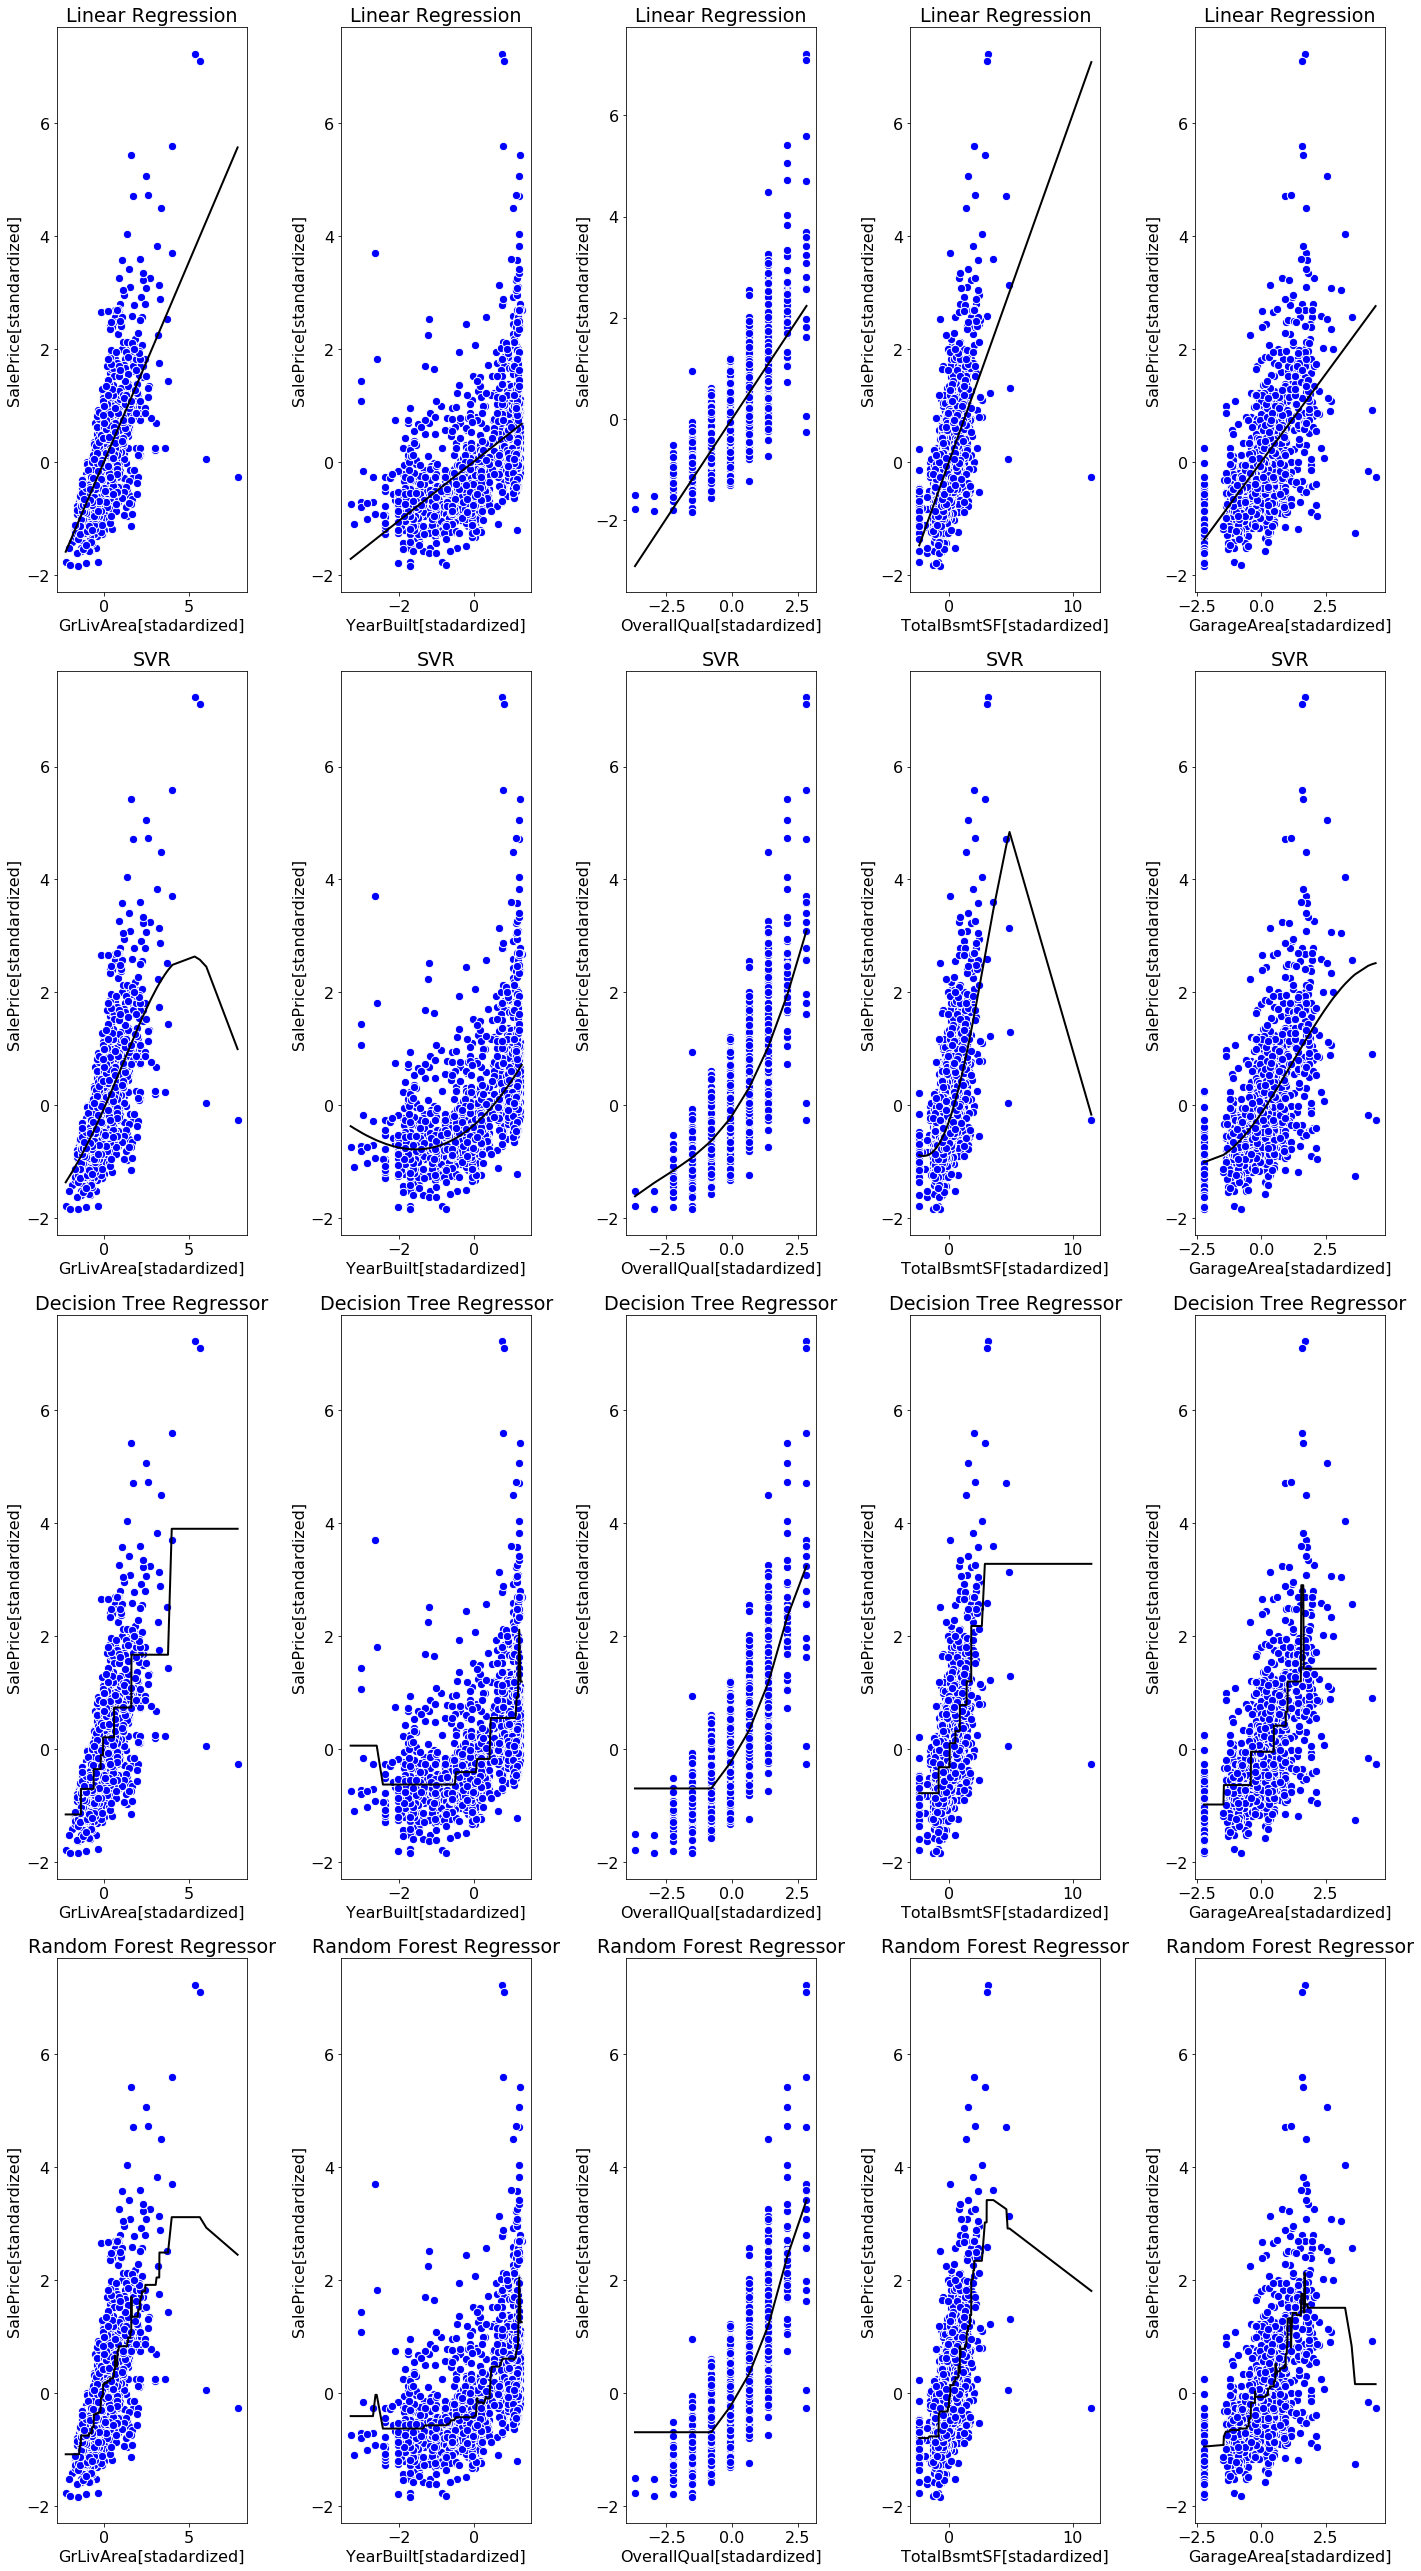

GrLivArea           YearBuilt           OverallQual  \
                              MSE R_squared       MSE R_squared         MSE   
Linear Regression            0.50      0.50      0.73      0.27        0.37   
SVR                          0.49      0.51      0.68      0.32        0.32   
Decision Tree Regressor      0.48      0.52      0.61      0.39        0.33   
Random Forest Regressor      0.46      0.54      0.61      0.39        0.33   

                                  TotalBsmtSF           GarageArea            
                        R_squared         MSE R_squared        MSE R_squared  
Linear Regression            0.63        0.62      0.38       0.61      0.39  
SVR                          0.68        0.58      0.42       0.59      0.41  
Decision Tree Regressor      0.67        0.53      0.47       0.54      0.46  
Random Forest Regressor      0.67        0.52      0.48       0.53      0.47

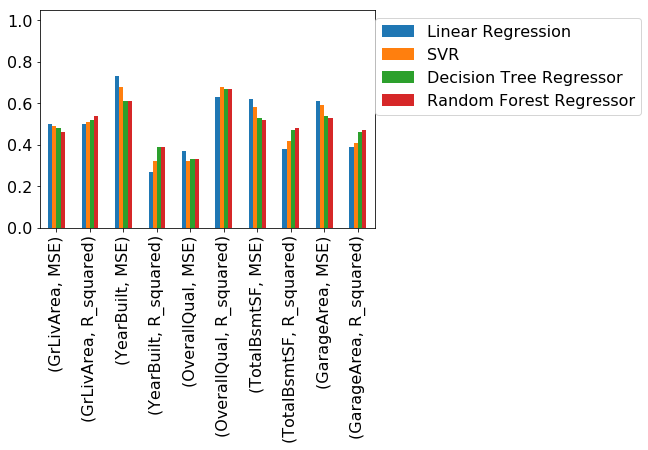

In [88]:
# 前項までの特徴量に加え、"OverallQual", "GarageArea", "TotalBsmtSF"を加えてプロットしてみる
train_list = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF", "GarageArea", "SalePrice"]
train = df_numeric.loc[:, train_list]
train

# データ生成
feature_names = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF", "GarageArea"]
target_name = "SalePrice"

X = train[feature_names].values.astype("float64") #この後のStadardScaler適用のため浮動小数点数に変更
y = train[target_name].values.astype("float64") #この後のStadardScaler適用のため浮動小数点数に変更

# 線形回帰モデルでは、説明変数・目的変数が正規分布に従っている必要はないため対数変換はしない

# 特徴量の標準化
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X) # 列ごと（特徴量ごと）に標準化

# 目的変数の標準化
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).ravel() # 変換器は2次元配列を期待するため、2次元にした後に戻す

# 関数実行のための変数を用意
model_names = ["Linear Regression", "SVR", "Decision Tree Regressor", "Random Forest Regressor"]
models = [lr(), 
          svr(kernel="rbf", C=100, gamma=0.01), 
          dtr(max_depth=3), 
          rfr(max_depth=3)]
feature_names = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF", "GarageArea"]
target_name = "SalePrice"

# 実際に関数実行
scoring_func(X_std, y_std, model_names, models, feature_names, target_name)

今回は2次元プロット可視化のため、特徴量ペアごとに回帰分析を行なった。以下は、全ての説明変数を使用して残差プロットしてみる。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


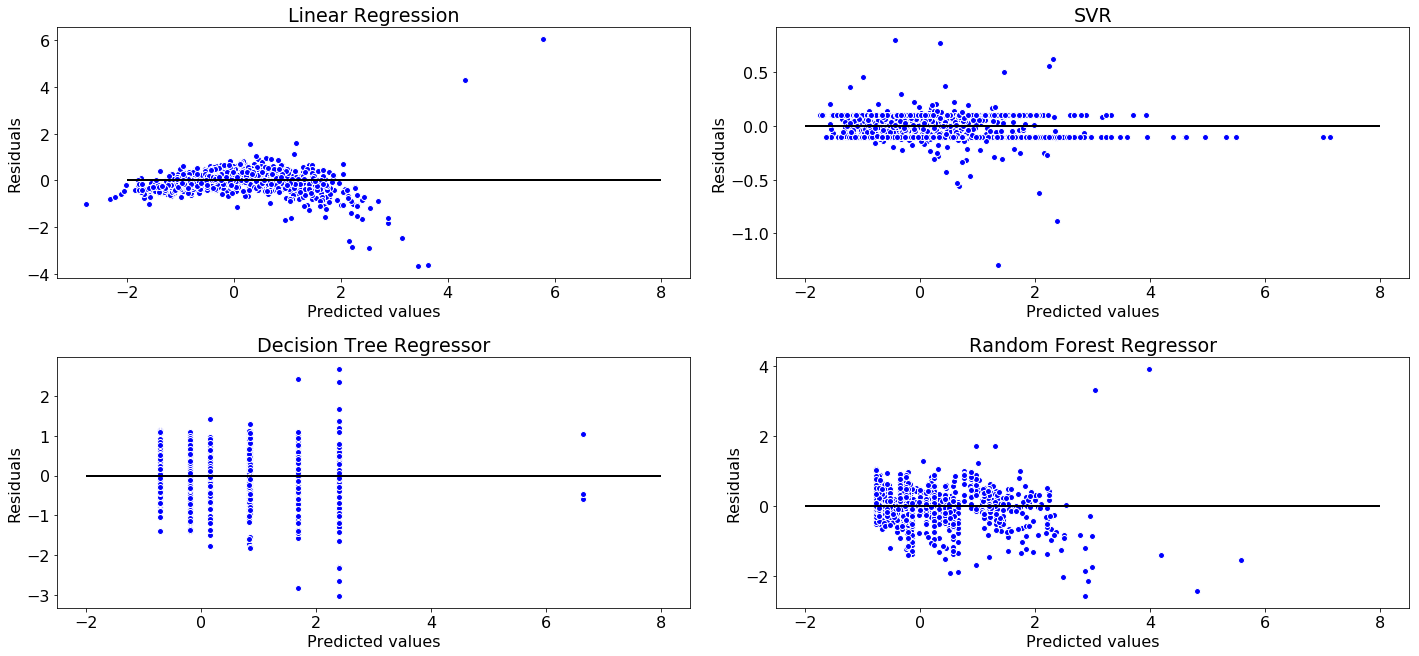

,MSE,R_squared
Linear Regression,0.19,0.81
SVR,0.01,0.99
Decision Tree Regressor,0.26,0.74
Random Forest Regressor,0.21,0.79


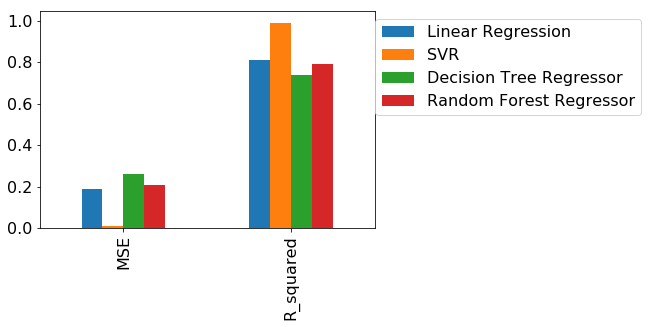

In [89]:
# データ生成
X = df_numeric.iloc[:, :-1].astype("float64")
y = df_numeric.iloc[:, -1].astype("float64")

# 特徴量の標準化
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X) # 列ごと（特徴量ごと）に標準化

# 目的変数の標準化
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).ravel() # 変換器は2次元配列を期待するため、2次元にした後に戻す

# 学習、推定、評価、可視化のための関数を作成（複数モデル計算に対応）
def scoring_func2(X, y, model_names, models):
    """
    複数の回帰モデルごとに複数の特徴量で学習し、以下を出力する。
    1. 予測値と回帰残差の2次元プロット
    2. 訓練データの平均二乗誤差(MSE)、訓練データの決定係数(R_squared)の2種スコアのモデル別集計表

    Parameters
    ----------------
    X_ : ndarray, shape(n_samples, n_features)
        特徴量データ
    y_ : ndarray, shape(n_samples,)
        目的変数データ
    model_names : list of str
        グラフタイトルと集計表に組み込むmodel名の一覧
    models : list of instances
        学習するモデルのインスンタスの一覧
    """
    plt.figure(figsize=(20, 9*(len(models)/2)))
    plt.rcParams["font.size"] = 16
    # subplotのためのイテレータを作成。
    subplot_iterator = iter(np.arange(1,len(models)+1))
    score = []
    for model_name, model in zip(model_names, models):
        # 各図は横軸に推測値、縦軸に回帰残差で可視化
        plt.subplot(len(models), 2, next(subplot_iterator))
        model.fit(X, y)
        # 評価指標（MSE、決定係数）をscoreリストへ格納
        y_pred = model.predict(X)
        score.append(mean_squared_error(y, y_pred))
        score.append(r2_score(y, y_pred))
        # 可視化
        plt.scatter(y_pred,  y_pred - y, c="blue", marker="o", edgecolor="white")
        plt.xlabel('Predicted values')
        plt.ylabel('Residuals')
        plt.hlines(y=0, xmin=-2, xmax=8, color='black', lw=2)
        plt.title(model_name)
    plt.tight_layout()
    plt.show()
    # scoreをpd.DataFrame形式に整形して表示
    score = np.array(score).reshape(-1, 2).round(2)
    columns = ["MSE", "R_squared"]
    score = pd.DataFrame(score, index=model_names, columns=columns)
    display(score)
    # scoreを棒グラフで表示
    score.T.plot(kind="bar") # スコア毎に棒グラフを表示
    plt.legend(loc="upper right", bbox_to_anchor=(1.82, 1))
    plt.ylim(0.0,1.05)
    plt.show()

# 関数実行のための変数を用意
model_names = ["Linear Regression", "SVR", "Decision Tree Regressor", "Random Forest Regressor"]
models = [lr(), 
          svr(kernel="rbf", C=100, gamma=0.01), 
          dtr(max_depth=3), 
          rfr(max_depth=3)]

# 実際に関数実行
scoring_func2(X_std, y_std, model_names, models)


MSEは下がり、R_squaredは各モデルとも大幅に改善している。以下は、5.で選択した5つの特徴量のみで可視化してみる。

/Users/arimoto/anaconda3/envs/python37/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


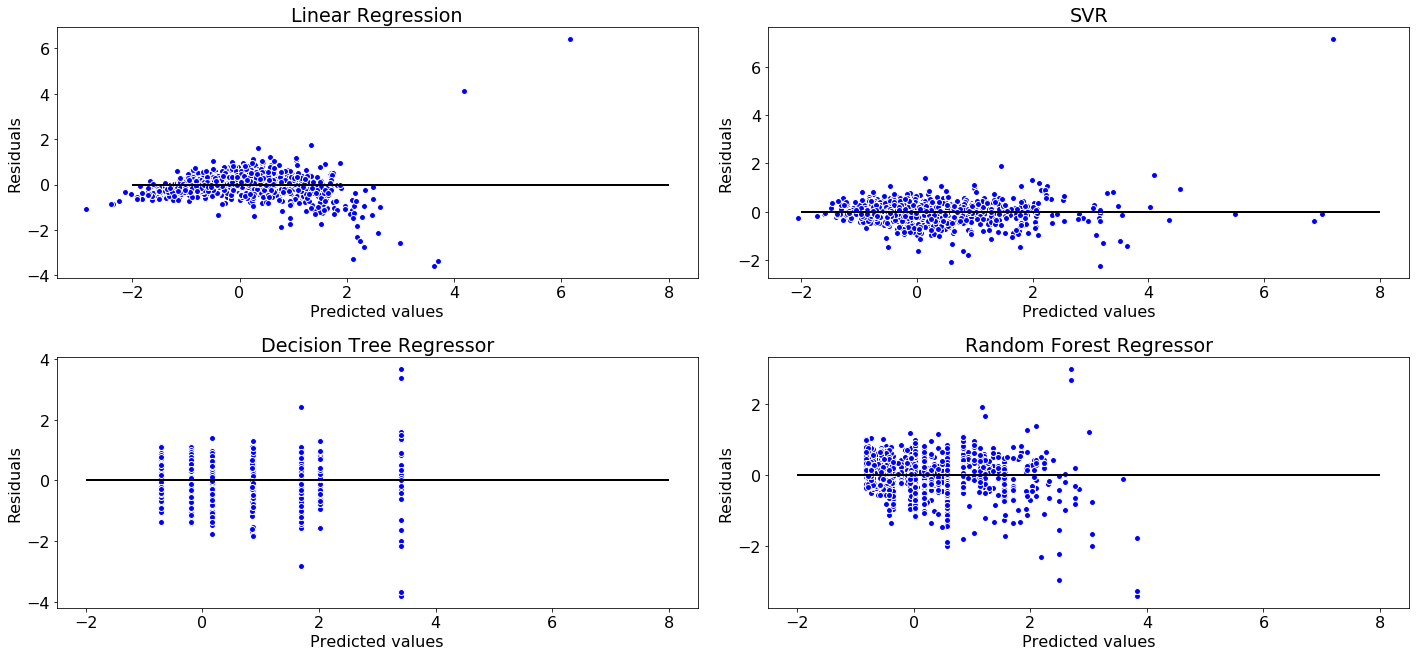

,MSE,R_squared
Linear Regression,0.23,0.77
SVR,0.15,0.85
Decision Tree Regressor,0.27,0.73
Random Forest Regressor,0.22,0.78


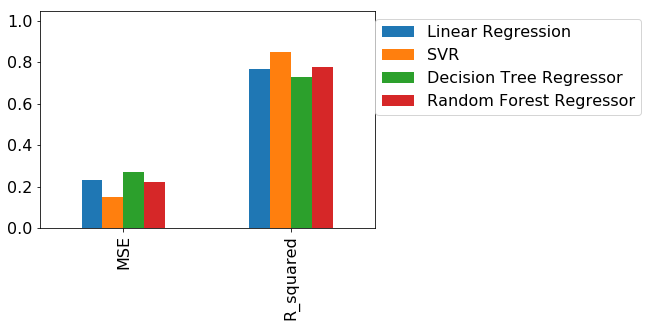

In [90]:
# データ生成
feature_names = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF", "GarageArea"]
X = df_numeric.loc[:, feature_names].astype("float64")
y = df_numeric.iloc[:, -1].astype("float64")

# 特徴量の標準化
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X) # 列ごと（特徴量ごと）に標準化

# 目的変数の標準化
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y[:, np.newaxis]).ravel() # 変換器は2次元配列を期待するため、2次元にした後に戻す

# 関数実行のための変数を用意
model_names = ["Linear Regression", "SVR", "Decision Tree Regressor", "Random Forest Regressor"]
models = [lr(), 
          svr(kernel="rbf", C=100, gamma=0.01), 
          dtr(max_depth=3), 
          rfr(max_depth=3)]

# 実際に関数実行
scoring_func2(X_std, y_std, model_names, models)

前項と比べてもR_squaredの減少は微小であり、選択した特徴量が回帰に大きく寄与していることがわかる。ただ、今回はtrain.csvのデータのみを使用し、テストデータを利用した汎化性能まで検討しなかったので、今後の予測の際には過学習についての考察も加味する必要がある。